<a href="https://colab.research.google.com/github/jasleenkaursandhu/Reproducing-chest-xray-report-generation-boag/blob/main/evaluate_nlg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install necessary packages
!pip install pycocoevalcap

# Import necessary libraries
import numpy as np
import pandas as pd
import os
import sys
from collections import defaultdict
import tqdm
from time import strftime, gmtime

# Try to import evaluation metrics
try:
    from pycocoevalcap.bleu.bleu import Bleu
    from pycocoevalcap.cider.cider import Cider
    print("Successfully imported evaluation metrics from pycocoevalcap")
except ImportError:
    print("Failed to import from pycocoevalcap, trying alternative installation")
    # Alternative installation
    !git clone https://github.com/salaniz/pycocoevalcap
    !pip install -e pycocoevalcap
    from pycocoevalcap.bleu.bleu import Bleu
    from pycocoevalcap.cider.cider import Cider
    print("Successfully installed and imported metrics using alternative method")

# Mount Google Drive if in Colab
from google.colab import drive
drive.mount('/content/drive')

# Define paths
base_path = '/content/drive/MyDrive/mimic-cxr-project'
output_dir = os.path.join(base_path, 'output')

# Load reference and prediction files
df_gt = pd.read_csv(os.path.join(output_dir, 'reference.tsv'), sep='\t')
df_random = pd.read_csv(os.path.join(output_dir, 'random.tsv'), sep='\t')

print(f"Reference data shape: {df_gt.shape}")
print(f"Random predictions shape: {df_random.shape}")

# Convert to the format expected by the evaluation metrics
references = {k:[v] for k,v in df_gt[['dicom_id','text']].values}
pred_random = {k:[v] for k,v in df_random[['dicom_id','generated']].values}

# Find common IDs between reference and predictions
common_ids = set(references.keys()) & set(pred_random.keys())
print(f"Number of cases with both reference and prediction: {len(common_ids)}")

# Keep only common IDs
references_filtered = {k:references[k] for k in common_ids}
pred_random_filtered = {k:pred_random[k] for k in common_ids}

methods = {'random': pred_random_filtered}

# Calculate BLEU scores
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

for method, pred in methods.items():
    bleu_scorer = Bleu(4)
    bleu_score = bleu_scorer.compute_score(references_filtered, pred)
    print(f'\t{method:10} (n={len(pred):6d}): {bleu_score[0]}')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

# Calculate CIDEr scores
print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

for method, pred in methods.items():
    cider_scorer = Cider()
    cider_score = cider_scorer.compute_score(references_filtered, pred)
    print(f'\t{method:10} (n={len(pred):6d}): {cider_score[0]}')

print(strftime("%Y-%m-%d %H:%M:%S", gmtime()))

Successfully imported evaluation metrics from pycocoevalcap
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reference data shape: (349, 2)
Random predictions shape: (382, 2)
Number of cases with both reference and prediction: 349
2025-04-06 02:30:59
{'testlen': 18521, 'reflen': 18172, 'guess': [18521, 18172, 17824, 17476], 'correct': [4303, 972, 242, 65]}
ratio: 1.01920537090023
	random     (n=   349): [0.23233086766372052, 0.1114769878919848, 0.055257794615328315, 0.02814576070992964]
2025-04-06 02:30:59
2025-04-06 02:30:59
	random     (n=   349): 0.03755690090088168
2025-04-06 02:31:00


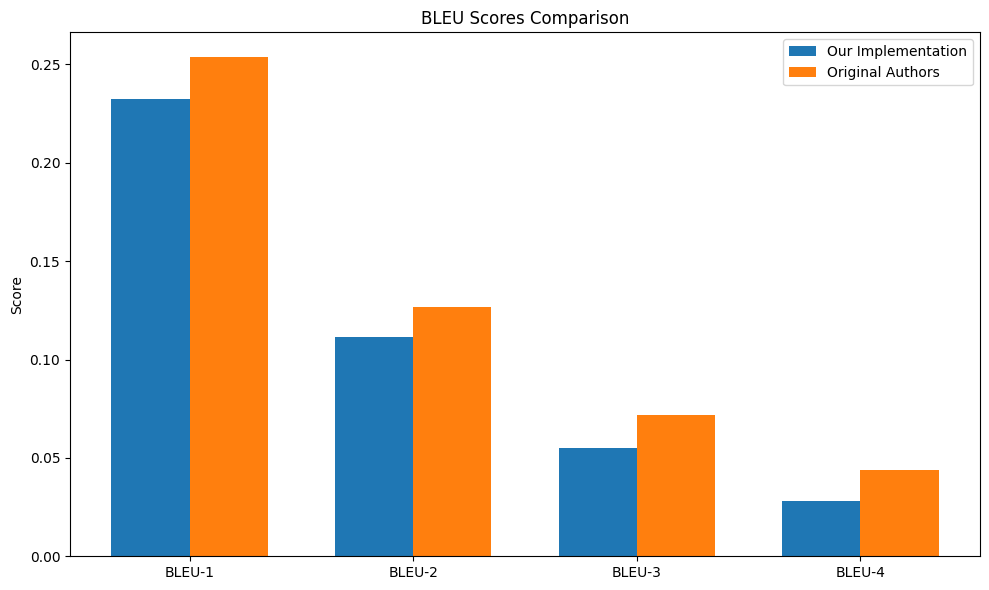

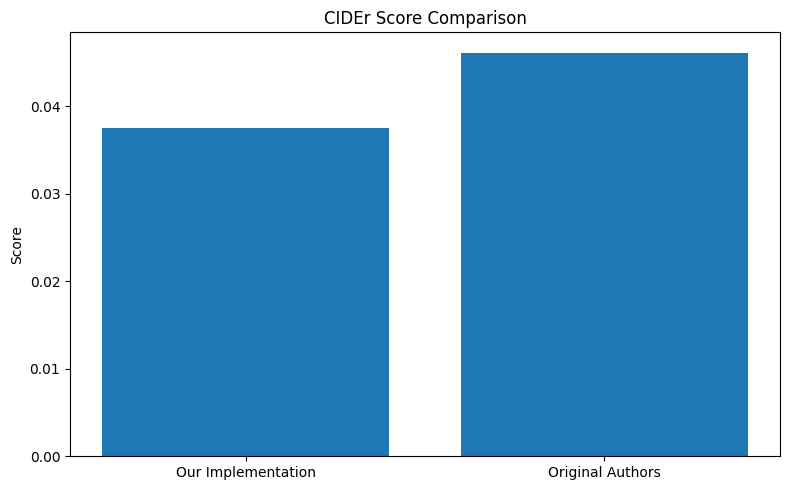

BLEU-1: Ours = 0.2323, Authors = 0.2536
BLEU-4: Ours = 0.0282, Authors = 0.0436
CIDEr:  Ours = 0.0376, Authors = 0.0462


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Our results
our_bleu = [0.23233, 0.11148, 0.05526, 0.02815]
our_cider = 0.03756

# Authors' results
authors_bleu = [0.25362, 0.12655, 0.07173, 0.04364]
authors_cider = 0.04617

# Create figure for BLEU scores
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(4)

plt.bar(x - width/2, our_bleu, width, label='Our Implementation')
plt.bar(x + width/2, authors_bleu, width, label='Original Authors')

plt.ylabel('Score')
plt.title('BLEU Scores Comparison')
plt.xticks(x, ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4'])
plt.legend()

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/mimic-cxr-project/output/bleu_comparison.png')
plt.show()

# Create figure for CIDEr scores
plt.figure(figsize=(8, 5))
plt.bar(['Our Implementation', 'Original Authors'], [our_cider, authors_cider])
plt.ylabel('Score')
plt.title('CIDEr Score Comparison')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/mimic-cxr-project/output/cider_comparison.png')
plt.show()

# Print simple comparison
print("BLEU-1: Ours = {:.4f}, Authors = {:.4f}".format(our_bleu[0], authors_bleu[0]))
print("BLEU-4: Ours = {:.4f}, Authors = {:.4f}".format(our_bleu[3], authors_bleu[3]))
print("CIDEr:  Ours = {:.4f}, Authors = {:.4f}".format(our_cider, authors_cider))